<a href="https://colab.research.google.com/github/joseeph/CombineDiff/blob/main/CombineDiff_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo APP for our paper CombineDiff

### library

In [1]:
!pip install -q gradio==3.48.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 37.8 M

In [2]:
# !pip uninstall diffusers
# !pip install diffusers==0.20.2 --upgrade diffusers[torch]
!pip install diffusers==0.26.2
# !pip install diffusers==0.23.0 --upgrade diffusers[torch]
!pip install accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 7.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [3]:
import gradio as gr
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
from diffusers import DiffusionPipeline
import PIL
from PIL import Image
from IPython.display import display

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [5]:
from diffusers.utils.torch_utils import randn_tensor

## UI with unclip pipeline

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pipeline.py:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

text_proj/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-7-daa965c1522f>:214: GradioDeprecationWarning: 'scale' value should be an integer. Using 1.5 will cause issues.
  with gr.Column(scale=1.5):
<ipython-input-7-daa965c1522f>:217: GradioDeprecationWarning: 'scale' value should be an integer. Using 1.5 will cause issues.
  with gr.Column(scale=1.5):
<ipython-input-7-daa965c1522f>:222: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  gallery = gr.Gallery(
<ipython-input-7-daa965c1522f>:225: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  gallery_2 = gr.Gallery(
<ipython-input-7-daa965c1522f>:233: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  btn = gr.Button("First Shoot").style(full_width=False)
<ipython-input-7-daa965c1522f>:233: GradioDeprecationWarning: Use `scale` in place of full_width in the constructor. scale=1 wil

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
IMPORTANT: You are using gradio version 3.48.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://fe2135804af01e8dab.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:358: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(


  0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


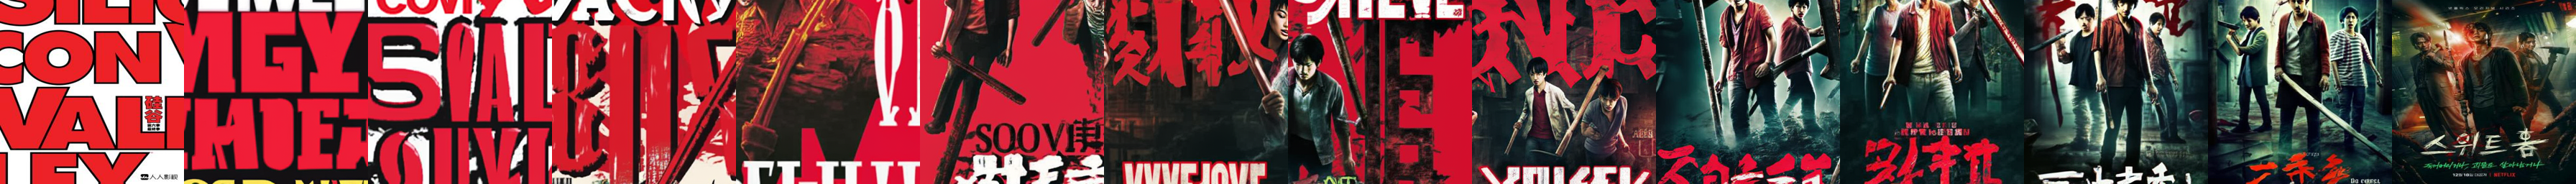

batch:  [1, 0]
state:  ['https://fe2135804af01e8dab.gradio.live/file=/tmp/gradio/8f3cb6a8b0a956493c9bb0207c14fc0acc27dcf7/image.png', 11]


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = con

state:  ['https://fe2135804af01e8dab.gradio.live/file=/tmp/gradio/1b5b9a42f8312cfcb93713391ade4d182711ed16/image.png', 10]


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = con

state:  ['https://fe2135804af01e8dab.gradio.live/file=/tmp/gradio/187f589a574b29980f133bd3041072d4d1caba1c/image.png', 8]


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = con

state:  ['https://fe2135804af01e8dab.gradio.live/file=/tmp/gradio/5eba375993dd81ada976ad7c9149a77e48a53806/image.png', 5]


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = con

state:  ['https://fe2135804af01e8dab.gradio.live/file=/tmp/gradio/dd5a137f0a8eb4aef59b1d5e590cbc15cdb752cb/image.png', 3]


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = con

state:  ['https://fe2135804af01e8dab.gradio.live/file=/tmp/gradio/ecc0d5f640c21b6c478dba5926c505c876a894e1/image.png', 1]


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = con

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://fe2135804af01e8dab.gradio.live


In [7]:
#global variable
# target = 0



if torch.cuda.is_available():
    device = "cuda"
    dtype = torch.float16
else:
    device = "cpu"
    dtype = torch.bfloat16

# pipe = DiffusionPipeline.from_pretrained("kakaobrain/karlo-v1-alpha-image-variations", torch_dtype=dtype, custom_pipeline='Josephwzy/custom_unclip_interpolation', use_auth_token=False, force_download=True)

pipe = DiffusionPipeline.from_pretrained("kakaobrain/karlo-v1-alpha-image-variations", torch_dtype=dtype, custom_pipeline='Josephwzy/custom_unclip_interpolation')

pipe.to(device)

# image: Optional[Union[List[PIL.Image.Image], torch.FloatTensor]] = None,
# steps: int = 5,
# r_factor: float = 1.25,
# decoder_num_inference_steps: int = 25,
# super_res_num_inference_steps: int = 7,
# generator: Optional[Union[torch.Generator, List[torch.Generator]]] = None,
# image_embeddings: Optional[torch.Tensor] = None,
# decoder_latents: Optional[torch.FloatTensor] = None,
# super_res_latents: Optional[torch.FloatTensor] = None,
# decoder_guidance_scale: float = 8.0,
# output_type: Optional[str] = "pil",
# return_dict: bool = True,
# #flag for first/second shoot
# generation_stage: bool = True,

# wrap image
def image_grid(imgs, img_l, img_r, pic, rows=1, cols=1):
  w, h = imgs[0].size
  cols = len(imgs) + 2  # Account for the added images img_l and img_r
  grid = Image.new("RGB", size=(cols * w, rows * h))


  if img_l is not None:
    img_l_resized = img_l.resize((w, h))  # Resize img_l to match the dimensions of imgs
    img_r_resized = img_r.resize((w, h))  # Resize img_r to match the dimensions of imgs
    images = [img_l_resized] + imgs + [img_r_resized]  # Add resized img_l and img_r
  else:
    img_r_resized = img_r.resize((w, h))  # Resize img_r to match the dimensions of imgs
    images = imgs[::-1] + [img_r_resized]  # Add resized img_l and img_r
  for i, img in enumerate(images):
      # Calculate the region to paste the image
      paste_box = (i * w, 0, (i + 1) * w, h)
      grid.paste(img, box=paste_box)

  # Display the grid image
  display(grid)
  pic = grid

def show_pic(pic1,pic2):
  display(pic1)
  display(pic2)

#Gen Real img
def unclip_image_interpolation(
  btn_id,
  start_image,
  end_image,
  steps,
  r,
  seed,
  tag,
  pos,
  second_shoot_img,
  batch,
  uid,
  first_pic,
  second_pic,
):
    generator = torch.Generator()
    generator.manual_seed(seed)
    stage = True
    if tag=='pos':
      stage=1
    else:
      stage=-1
    images = [start_image, end_image]
    # print('batch: ', batch[-1])
    if btn_id=='first':
      output = pipe(image=images, steps=steps, r_factor=r, generator=generator, generation_stage=btn_id)
      imgs = [(img, i) for i, img in enumerate(output.images)]

      image_grid(output.images, start_image, end_image, first_pic)

      batch.append([batch[-1][0]+1,0])
      print('batch: ', batch[-1])
      return imgs
    else:
      print('tag: ', stage)
      output = pipe(image=images, steps=steps, r_factor=r, generator=generator, generation_stage=btn_id, second_shoot_start_pos=pos[-1], second_shoot_img=second_shoot_img, second_shoot_side=stage)
      imgs = [(img, i) for i, img in enumerate(output.images[::-1])]
      batch.append([batch[-1][0],batch[-1][1]+1])
      print('batch: ', batch[-1])
      # batch.append(batch[-1]+1)
      image_grid(output.images, None, second_shoot_img, second_pic)
      return imgs

def min_max_scaling_0_5(arr, val=1):
    """Scale the array values to the range [-0.5, 0] using min-max scaling."""
    min_val = min(arr)
    max_val = max(arr)
    if val==1:
      scaled_arr = [((x - min_val) / (max_val - min_val)) * 0.5 for x in arr]
    else:
      scaled_arr = [((x - min_val) / (max_val - min_val)) * 0.5 - 0.5 for x in arr]

    return scaled_arr

def min_max_scaling(arr):
    """Scale the array values to the range [0, 1] using min-max scaling."""
    min_val = min(arr)
    max_val = max(arr)

    scaled_arr = [(x - min_val) / (max_val - min_val) for x in arr]

    return scaled_arr


def generated_geo_interval(num=10, r=1.25, a=1):
  sequence = []

  for a_n in range(int((num+1)/2)):
      value = 1*np.exp(np.log(1/r)*a_n)
      sequence.append(value)

  x_1 = [0.5 - d/2  for d in sequence]
  x_1 = [k + (0.5-np.max(x_1)) for k in x_1 ]

  x_2 = [d/2 + 0.5 for d in sequence]
  x_2 = [ e- (np.min(x_2)-0.5) for e in x_2]
  new_seq = np.concatenate([x_1,x_2])
  new_seq.sort()
  new_seq = min_max_scaling(new_seq)

  color_array = np.arange(len(new_seq))
  fig = plt.figure(figsize=(12, 4))
  plt.scatter(new_seq,[0]*len(new_seq),s=250, c=color_array, cmap='viridis', label="Interpolated Points", alpha=0.6)
  plt.colorbar(label='Index')
  plt.ylim(-1,1)
  return fig, new_seq

def second_shoot_interval(num=10, r=1.25, tag='pos', target_point=None, first_step=None, first_r=None):
  print(tag)
  sequence = []
  side=0
  if tag=='pos':
    side=1
  else:
    side=-1
  for a_n in range(num):
    value = side*np.exp(np.log(1/r)*a_n)
    sequence.append(value)

  # print('before seq:', sequence)
  if tag=='pos':
    sequence = [ (e- np.min(sequence))/2 for e in sequence]
    sequence = min_max_scaling_0_5(sequence,1)
  else:
    sequence = [ (e- np.max(sequence))/2 for e in sequence]
    sequence = min_max_scaling_0_5(sequence,-1)
  # print('after seq:', sequence)

  fig, new_seq = generated_geo_interval(first_step, first_r)

  curve = [1/np.exp(k/4)/2 for k in list(range(len(sequence)))]
  if tag=='pos':
    plt.scatter([new_seq[target_point[-1]]+_*0.1 for _ in curve], sequence, s=250, c='red', marker='*', alpha=0.6)  # draw a star on selected point
  else:
    plt.scatter([new_seq[target_point[-1]]-_*0.1 for _ in curve], sequence, s=250, c='blue', marker='^', alpha=0.6)  # draw a star on selected point
  return fig

def highlight_point(num, r):
  fig, new_seq = generated_geo_interval(num, r)

  return fig

def take_name(evt: gr.SelectData, num, r, state ):

  fig, new_seq = generated_geo_interval(num, r)
  point_index = evt.value
  state.append(point_index)
  print('state: ',state[-1])
  # Handle None case for point_index
  if point_index is None:
      point_index = 0
  elif not isinstance(point_index, int):
      point_index = int(point_index[0])

  # print(f"point_index after conversion: {point_index}")  # print to check


  # print(f"selected_point: {selected_point}")  # print to check
  selected_point = new_seq[point_index]
  plt.scatter(selected_point, 0, s=500, c='red', marker='*')  # draw a star on selected point
  # print(evt.value)
  return fig

with gr.Blocks() as demo:
  select_pic = gr.State([])
  batch = gr.State([[0,0]])
  # generated img in a row
  batch_img_first_s = gr.State()
  batch_img_Second_s = gr.State()
  with gr.Row():
    with gr.Column(scale=3):
      with gr.Row():
        with gr.Column(scale=1.5):
          left_img=gr.Image(label='First Image',type="pil")

        with gr.Column(scale=1.5):
          right_img=gr.Image(label='Second Image',type="pil")
      # with gr.Column(scale=3):
    # radios = gr.Radio(list(range(38)), label='Choose a point')  # assuming a maximum of 38 points
      plot = gr.Plot(label="Interpolation plot")
      gallery = gr.Gallery(
            label="Generated images", show_label=True, elem_id="gallery",show_download_button=True
        ).style(columns=[10], rows=[4], object_fit="contain", height="auto")
      gallery_2 = gr.Gallery(
            label="Second shoot images", show_label=True, elem_id="gallery",show_download_button=True
        ).style(columns=[10], rows=[2], object_fit="contain", height="auto")
    with gr.Column(scale=1):
      uid = gr.Number(label='user id')
      step_slider = gr.Slider(minimum=6, maximum=38, value=12, step=2, label='Interpolation steps')
      radius_slider = gr.Slider(minimum=1.05, maximum=2.0, value=1.3 ,step=0.05, label= 'r')
      seed = gr.Number(label='seed', value=0, precision=0)
      btn = gr.Button("First Shoot").style(full_width=False)
      sceond_shoot_img=gr.Image(label='Second Shoot',type="pil")
      #second shoot
      radios_tag = gr.Radio(["pos","neg"], value="pos",label='choose direction', visible=False)
      step_slider_2 = gr.Slider(minimum=3, maximum=21, value=12, step=2, label='Interpolation steps')
      radius_slider_2 = gr.Slider(minimum=1.05, maximum=2.0, value=1.3 ,step=0.05, label= 'r')
      second_shoot_btn=gr.Button("Second shoot")

      # show_btn = gr.Button("show pic")

  step_slider.release(highlight_point, inputs=[step_slider, radius_slider], outputs=[plot])
  radius_slider.release(highlight_point, inputs=[step_slider, radius_slider], outputs=[plot])
  # radios.change(highlight_point, inputs=[step_slider, radius_slider, radios], outputs=[plot])
  batch_img_Second_s = gr.State()
  btn.click(unclip_image_interpolation, inputs=[gr.State('first'),left_img, right_img, step_slider, radius_slider, seed, radios_tag, gr.State(),gr.State(), batch, uid, batch_img_first_s, batch_img_Second_s],  outputs=gallery)
  gallery.select(take_name, inputs=[step_slider, radius_slider, select_pic], outputs=[plot])
  demo.load(highlight_point, inputs=[step_slider, radius_slider], outputs=[plot])

  # show_btn.click(fn=show_pic, inputs=[batch_img_first_s, batch_img_Second_s])

  # second shoot
  #second_shoot_interval(num=10, r=1.25, tag='pos', target_point, first_step, first_r):
  step_slider_2.release(second_shoot_interval, inputs=[step_slider_2, radius_slider_2, radios_tag, select_pic, step_slider, radius_slider], outputs=[plot])
  radius_slider_2.release(second_shoot_interval, inputs=[step_slider_2, radius_slider_2, radios_tag, select_pic, step_slider, radius_slider], outputs=[plot])
  radios_tag.change(second_shoot_interval, inputs=[step_slider_2, radius_slider_2, radios_tag, select_pic, step_slider, radius_slider], outputs=[plot])
  second_shoot_btn.click(unclip_image_interpolation, inputs=[gr.State('second'),left_img, sceond_shoot_img, step_slider_2, radius_slider_2, seed, radios_tag, select_pic, sceond_shoot_img, batch, uid, batch_img_first_s, batch_img_Second_s],  outputs=gallery_2)
  # print(step_slider.value)

if __name__ == "__main__":
  demo.launch(debug=True, share=True)
    # demo.launch(debug=True)
